## Prepare a prediction model for a profit of 50_startups data.                                        ~Gautam Mishra

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Numpy-Numerical Python that Deals with numbers.

Pandas-Used to analyse data.It has functions for analyzing,cleaning,exploring and manipulating Data.

Matplotlib-comprehensive library for creating static, animated, and interactive visualizations.

Seaborn-Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Warnings are provided to warn the developer of situations that aren’t necessarily exceptions and ignore them

In [2]:
df=pd.read_csv('50_Startups.csv')

Reading Csv file and storing it in a variable 'df'

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Displayng top 5 entries from data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


The dataset contains 50 rows and 5 columns with no null values.
Among 5 columns 4 columns are numerical columns and 1 column is object

In [5]:
df.duplicated().any()

False

The dataset does not contain duplicated value

In [6]:
from sklearn.preprocessing import LabelEncoder

We are importing LabelEncoder from sklearn.preprocessing.
LabelEncoder is used to transform non-numerical labels to numerical labels.

In [7]:
le=LabelEncoder()

Storing LabelEncoder in a variable le.

In [8]:
model=le.fit(df['State'])

fit is used to fit the encoder, with the help of le we fit the label and store it in 'model'

In [9]:
df['State']=model.transform(df['State'])

transform is used to transform categorical variable to numberical

In [10]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


Our 'State' column is also now Numerical column now we can do predictions.

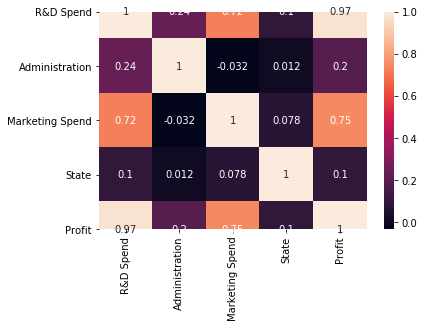

In [11]:
sns.heatmap(df.corr(),annot=True)

With respect to 'Profit' variable 'R&D Spend' and 'Marketing Spend' are strong positively co-related.

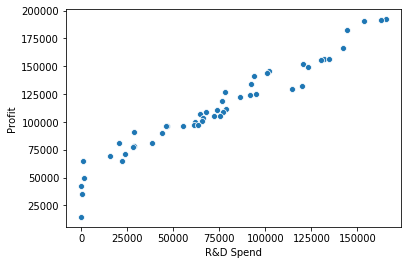

In [12]:
sns.scatterplot(df['R&D Spend'],df['Profit'])

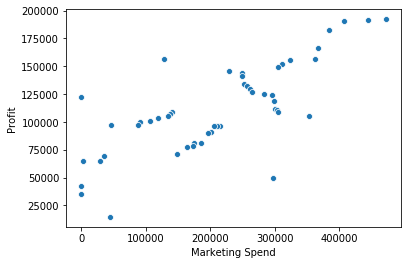

In [13]:
sns.scatterplot(df['Marketing Spend'],df['Profit'])

### Multiple Linear REgression

In [14]:
#Independent Variable or features

In [15]:
X=df[['R&D Spend','Marketing Spend']]

In [16]:
#dependent Variable

In [17]:
y=df['Profit']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

 train test split function returns train test data which we store in X_train, X_test,y_train,y_test variable. With help of test_size we can also provide the percentage of data which we want to provide for testing.

In [20]:
X_train.shape

(40, 2)

In [21]:
y_train.shape

(40,)

In [22]:
X_test.shape

(10, 2)

In [23]:
y_test.shape

(10,)

In [24]:
#Building Model

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
reg=LinearRegression()

In [27]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
#Predictions on train data

In [29]:
y_train_pred=reg.predict(X_train)

In [30]:
#Prediction on test data

In [31]:
y_test_pred=reg.predict(X_test)


In [32]:
from sklearn.metrics import r2_score,mean_squared_error
def model_performance(y_actual,y_pred):
    r2=r2_score(y_actual,y_pred)
    rmse=np.sqrt(mean_squared_error(y_actual,y_pred))
    print('R2 score:{}  |  RMSE:{}'.format(round(r2,2),round(rmse,2)))

In [33]:
print('Training Performance')
model_performance(y_train,y_train_pred)
print('Testing Performance')
model_performance(y_test,y_test_pred)

Training Performance
R2 score:0.94  |  RMSE:9351.46
Testing Performance
R2 score:0.97  |  RMSE:7046.03


### Predictions

In [34]:
reg.predict([[165349.20,471784.10]])

array([191830.74511548])

In [35]:
reg.predict([[162597.70,443898.53]])

array([188660.16942513])